#  Introduction: Three-Body Problem Inspired by Sci-Fi

I was deeply inspired by the science fiction novel *The Three-Body Problem* by Liu Cixin. In the story, an alien civilization known as the **Trisolarans** lives on a planet orbiting within a **three-star system**, which is Alpha Centauri triple stars system. Because of the chaotic and unpredictable nature of the **three-body gravitational interactions**, they suffer through extreme environmental instability—sometimes falling into one of their "suns," or drifting away from their system entirely. Facing this constant existential threat, the Trisolarans eventually set their sights on Earth as a more stable refuge.

This story motivated me to explore the **three-body problem** from a physics and mathematical perspective. In this project, I simulate the motion of three gravitationally interacting bodies using both the:

- **Lagrangian formalism** (based on energy differences and Euler–Lagrange equations), and  
- **Hamiltonian formalism** (based on total energy and canonical equations of motion)

Through this, I hope to gain an appreciation for how complex and unstable the three-body system really is—and why it has captured the imagination of both scientists and science fiction writers for centuries.


##  Assumptions and Simplifications

To make the simulation of the three-body problem computationally feasible and conceptually focused, the following assumptions are applied:

- The **gravitational constant \( G \)** is normalized to **1**.
- The **masses of the stars** are scaled relative to the mass of the Sun.
- The system is restricted to **2D motion** (in the $x$-$y$ plane) to simplify calculations.
- **Collisions between stars are not allowed** — bodies are treated as point masses with no physical size.
- **General relativistic effects** are ignored; the simulation is purely Newtonian.

These assumptions allow us to study the qualitative behavior of the three-body system while keeping the numerical implementation efficient and interpretable.


#  Theory and System Setup

##  Theoretical Background

The **three-body problem** describes the motion of three massive bodies interacting through gravity, governed by **Newton's laws of motion** and **universal gravitation**. Unlike the two-body problem, which has an analytical solution, the three-body problem is **nonlinear**, **chaotic**, and **has no general closed-form solution**.

There are two powerful frameworks used to describe such systems: Largrangian Mechanics and Hamiltonian Mechanics

###  Lagrangian Mechanics

- Based on the **principle of least action**
- The **Lagrangian** is defined as:

  $$
  \mathcal{L} = T - V
  $$

  where \( T \) is kinetic energy and \( V \) is potential energy.

- The equations of motion are derived using the **Euler–Lagrange equation**:

  $$
  \frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{q}_i} \right) - \frac{\partial \mathcal{L}}{\partial q_i} = 0
  $$


###  Hamiltonian Mechanics

- Reformulates classical mechanics in terms of **positions** and **momenta**
- The **Hamiltonian** represents the **total energy** of the system:
  $$
  \mathcal{H} = T + V
  $$
- The equations of motion become:
  $$
  \dot{q}_i = \frac{\partial \mathcal{H}}{\partial p_i}, \quad \dot{p}_i = -\frac{\partial \mathcal{H}}{\partial q_i}
  $$
- Hamiltonian systems are often used in **symplectic integrators** for stable long-term simulations.

---

##  Physical Setup

In this simulation, I model **three gravitational bodies** (of equal or different masses), each initialized with:

- A position in 2D space: $(x_i, y_i)$
- A velocity (or momentum): $(v_{x_i}, v_{y_i})$

The bodies interact via Newtonian gravity:
$$
F_{ij} = G \cdot \frac{m_i m_j}{r_{ij}^2}
$$

Where:
- $r_{ij}$ is the distance between bodies $i$ and $j$
- $G$ is the gravitational constant (set to 1 for simplicity)

---

##  Numerical Integration

- The system is solved using `solve_ivp` with high precision tolerances.
- Both **position** and **momentum** (or velocity) are tracked over time to visualize orbits.



In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

#  Lagrangian Mechanics

- Based on the **principle of least action**
- The **Lagrangian** is defined as:

  $$
  \mathcal{L} = T - V
  $$

  where \( T \) is kinetic energy and \( V \) is potential energy.

- The equations of motion are derived using the **Euler–Lagrange equation**:

  $$
  \frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{q}_i} \right) - \frac{\partial \mathcal{L}}{\partial q_i} = 0
  $$
  
 **Example: Equation for** ($\ddot{x}_1$)

The following is the analytical result for the second derivative of $x_1$ ($\ddot{x}_1$) derived from the Lagrangian of a three-body system:


$$
\ddot{x}_1 = -\frac{G \cdot m_1 \left[ 
    m_2 (x_1 - x_2) \left( (x_1 - x_3)^2 + (y_1 - y_3)^2 \right)^{3/2} +
    m_3 (x_1 - x_3) \left( (x_1 - x_2)^2 + (y_1 - y_2)^2 \right)^{3/2}
\right]}{
    \left( (x_1 - x_2)^2 + (y_1 - y_2)^2 \right)^{3/2}
    \cdot
    \left( (x_1 - x_3)^2 + (y_1 - y_3)^2 \right)^{3/2}
}
$$


In [2]:
class Lagrangian():
    def __init__(self, m1, m2, m3, G=1.0):
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.G = G
    
    def dy_dt(self, t, y):  # Changed to take a single state vector y
        # Unpack all variables from the state vector y
        x1, vx1, y1, vy1, x2, vx2, y2, vy2, x3, vx3, y3, vy3 = y
        
        RHS_x1=(-self.G*self.m1*(self.m2*(x1 - x2)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2) + self.m3*(x1 - x3)*((x1 - x2)**2 + (y1 - y2)**2)**(3/2))/
            (((x1 - x2)**2 + (y1 - y2)**2)**(3/2)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2)))/self.m1
        RHS_x2=(self.G*self.m2*(self.m1*(x1 - x2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2) - self.m3*(x2 - x3)*((x1 - x2)**2 + (y1 - y2)**2)**(3/2))/
            (((x1 - x2)**2 + (y1 - y2)**2)**(3/2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2)))/self.m2
        RHS_x3=(self.G*self.m3*(self.m1*(x1 - x3)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2) + self.m2*(x2 - x3)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2))/
            (((x1 - x3)**2 + (y1 - y3)**2)**(3/2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2)))/self.m3
        RHS_y1=(-self.G*self.m1*(self.m2*(y1 - y2)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2) + self.m3*(y1 - y3)*((x1 - x2)**2 + (y1 - y2)**2)**(3/2))/
            (((x1 - x2)**2 + (y1 - y2)**2)**(3/2)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2)))/self.m1
        RHS_y2=(self.G*self.m2*(self.m1*(y1 - y2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2) - self.m3*(y2 - y3)*((x1 - x2)**2 + (y1 - y2)**2)**(3/2))/
            (((x1 - x2)**2 + (y1 - y2)**2)**(3/2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2)))/self.m2
        RHS_y3=(self.G*self.m3*(self.m1*(y1 - y3)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2) + self.m2*(y2 - y3)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2))/
            (((x1 - x3)**2 + (y1 - y3)**2)**(3/2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2)))/self.m3
        
        derivatives = [
            vx1, RHS_x1, vy1, RHS_y1,
            vx2, RHS_x2, vy2, RHS_y2,
            vx3, RHS_x3, vy3, RHS_y3
        ]
        return derivatives
    
    def solve_ode(self, t_pts, initial_conditions, 
                  abserr=1.0e-9, relerr=1.0e-9):
        # Combine all initial conditions into a single vector
        y0 = initial_conditions
        
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y0, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)

        # Extract the solutions for each particle
        r1 = solution.y[0:4]  # x1, vx1, y1, vy1
        r2 = solution.y[4:8]  # x2, vx2, y2, vy2
        r3 = solution.y[8:12] # x3, vx3, y3, vy3
        
        return r1, r2, r3

#  Hamiltonian Mechanics

- Reformulates classical mechanics in terms of **positions** and **momenta**
- The **Hamiltonian** here represents the **total energy** of the system:
  $$
  \mathcal{H} = T + V
  $$
- The equations of motion become:
  $$
  \dot{q}_i = \frac{\partial \mathcal{H}}{\partial p_i}, \quad \dot{p}_i = -\frac{\partial \mathcal{H}}{\partial q_i}
  $$
- Hamiltonian systems are often used in **symplectic integrators** for stable long-term simulations.


**For body 1 in the $x$-direction, the expression becomes:**

$$
\dot{p}_{x_1} = \frac{\partial H}{\partial x_1} =
G \cdot m_1 \cdot \frac{
    m_2 (x_1 - x_2) \left( (x_1 - x_3)^2 + (y_1 - y_3)^2 \right)^{3/2} +
    m_3 (x_1 - x_3) \left( (x_1 - x_2)^2 + (y_1 - y_2)^2 \right)^{3/2}
}{
    \left( (x_1 - x_2)^2 + (y_1 - y_2)^2 \right)^{3/2}
    \cdot
    \left( (x_1 - x_3)^2 + (y_1 - y_3)^2 \right)^{3/2}
}
$$
$$
\dot{x}_1 = \frac{\partial H}{\partial p_{x_1}} = \frac{p_{x_1}}{m_1}
$$

In [3]:
class Hamiltonian():
    def __init__(self, m1, m2, m3, G=1.0):
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.G = G
    
    def dy_dt(self, t, y):  # Changed to take a single state vector y
        # Unpack all variables from the state vector y
        x1, vx1, y1, vy1, x2, vx2, y2, vy2, x3, vx3, y3, vy3 = y
        px1 = vx1*self.m1
        px2 = vx2*self.m2
        px3 = vx3*self.m3
        py1 = vy1*self.m1
        py2 = vy2*self.m2
        py3 = vy3*self.m3
        
        RHS_x1=px1/self.m1
        RHS_x2=px2/self.m2
        RHS_x3=px3/self.m3
        RHS_y1=py1/self.m1
        RHS_y2=py2/self.m2
        RHS_y3=py3/self.m3
        RHS_vx1=-(self.G*self.m1*(self.m2*(x1 - x2)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2) + self.m3*(x1 - x3)*((x1 - x2)**2 + (y1 - y2)**2)**(3/2))/
                  (((x1 - x2)**2 + (y1 - y2)**2)**(3/2)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2)))/self.m1
        RHS_vx2=-(-self.G*self.m2*(self.m1*(x1 - x2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2) - self.m3*(x2 - x3)*((x1 - x2)**2 + (y1 - y2)**2)**(3/2))/
                  (((x1 - x2)**2 + (y1 - y2)**2)**(3/2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2)))/self.m2
        RHS_vx3=-(-self.G*self.m3*(self.m1*(x1 - x3)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2) + self.m2*(x2 - x3)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2))/
                  (((x1 - x3)**2 + (y1 - y3)**2)**(3/2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2)))/self.m3
        RHS_vy1=-(self.G*self.m1*(self.m2*(y1 - y2)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2) + self.m3*(y1 - y3)*((x1 - x2)**2 + (y1 - y2)**2)**(3/2))/
                  (((x1 - x2)**2 + (y1 - y2)**2)**(3/2)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2)))/self.m1
        RHS_vy2=-(-self.G*self.m2*(self.m1*(y1 - y2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2) - self.m3*(y2 - y3)*((x1 - x2)**2 + (y1 - y2)**2)**(3/2))/
                  (((x1 - x2)**2 + (y1 - y2)**2)**(3/2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2)))/self.m2
        RHS_vy3=-(-self.G*self.m3*(self.m1*(y1 - y3)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2) + self.m2*(y2 - y3)*((x1 - x3)**2 + (y1 - y3)**2)**(3/2))/
                  (((x1 - x3)**2 + (y1 - y3)**2)**(3/2)*((x2 - x3)**2 + (y2 - y3)**2)**(3/2)))/self.m3
        
        derivatives = [
            RHS_x1, RHS_vx1, RHS_y1, RHS_vy1,
            RHS_x2, RHS_vx2, RHS_y2, RHS_vy2,
            RHS_x3, RHS_vx3, RHS_y3, RHS_vy3
        ]
        return derivatives
    
    def solve_ode(self, t_pts, initial_conditions, 
                  abserr=1.0e-9, relerr=1.0e-9):
        # Combine all initial conditions into a single vector
        y0 = initial_conditions
        
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y0, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)

        # Extract the solutions for each particle
        r1 = solution.y[0:4]  # x1, vx1, y1, vy1
        r2 = solution.y[4:8]  # x2, vx2, y2, vy2
        r3 = solution.y[8:12] # x3, vx3, y3, vy3
        
        return r1, r2, r3

##  Alpha Centauri Simulation with Interactive Initial Conditions

In this part of the project, I explore the **Alpha Centauri triple star system**, which is featured in the science fiction novel *The Three-Body Problem*.

I found the **real relative masses** of the three stars compared to our Sun:

- **Alpha Centauri A**: $m_1 = 1.0788 \, M_{\odot}$
- **Alpha Centauri B**: $m_2 = 0.9092 \, M_{\odot}$
- **Proxima Centauri**: $m_3 = 0.1221 \, M_{\odot}$

These values are used in the simulation to create a more realistic physical model of the system.

To investigate the chaotic nature of the three-body problem, I created an **interactive widget** that lets me modify the **initial positions and velocities** of the stars. This allows me to directly observe how even small changes in the initial conditions can have a **significant impact on the system's behavior**, demonstrating the sensitive dependence on initial conditions that is characteristic of chaotic systems like this.

You can adjust these sliders to explore questions like:
- Does the system remain bound?
- Which star is ejected first?
- How stable are particular orbital setups?

This setup shows just how complex and unpredictable a realistic three-body system can be—especially with actual astrophysical parameters.(I round the masses here to one digit to make the running time shorter)


In [4]:
import ipywidgets as widgets
from IPython.display import display

def interactive_plot(x1, x2, x3, y1, y2, y3):
    # fixed masses and G
    m1 = 1.1  # α Centauri A 
    m2 = 0.9  # α Centauri B 
    m3 = 0.1  # Proxima Centauri 
    m = 1
    G = 1.0
    ic = [x1, 0.0, y1, 0.0,
          x2, 0.0, y2, 0.0,
          x3, 0.0, y3, 0.0]
    t = np.linspace(0, 20, 300)
    lag = Lagrangian(m1, m2, m3, G)
    r1, r2, r3 = lag.solve_ode(t, ic)

    plt.figure(figsize=(6,6))
    plt.plot(r1[0], r1[2], label='Body 1')
    plt.plot(r2[0], r2[2], label='Body 2')
    plt.plot(r3[0], r3[2], label='Body 3')
    plt.xlabel('x'); plt.ylabel('y')
    plt.title('Trajectories (x vs y)')
    plt.legend(); plt.axis('equal')
    plt.show()

# sliders for x1, x2, x3, y1, y2, y3
sliders = {
    'x1': widgets.FloatSlider(value=1.0, min=-5, max=5, step=0.1, description='x1'),
    'x2': widgets.FloatSlider(value=-0.5, min=-5, max=5, step=0.1, description='x2'),
    'x3': widgets.FloatSlider(value=-0.5, min=-5, max=5, step=0.1, description='x3'),
    'y1': widgets.FloatSlider(value=0.0, min=-5, max=5, step=0.1, description='y1'),
    'y2': widgets.FloatSlider(value=0.2, min=-5, max=5, step=0.1, description='y2'),
    'y3': widgets.FloatSlider(value=-0.2, min=-5, max=5, step=0.1, description='y3'),
}

controls = widgets.VBox([
    widgets.HBox([sliders['x1'], sliders['x2'], sliders['x3']]),
    widgets.HBox([sliders['y1'], sliders['y2'], sliders['y3']]),
])

out = widgets.interactive_output(interactive_plot, sliders)

display(controls, out)


Output()

##  Chaotic Evolution from Random Initial Conditions

I apply a **random initial condition** to the Alpha Centauri triple star system. The three stars start with arbitrary positions and velocities (within a reasonable range), and I simulate their gravitational interactions over time.

To visualize the system's evolution, I plot:
- The **trajectories** of all three masses in the $x$-$y$ plane
- The **phase space diagrams** for each body, showing:
  - $x$ vs. $v_x$
  - $y$ vs. $v_y$
- Animation of the first 25 second motion

This clearly illustrates the **chaotic nature** of the three-body problem: three bodies system is extremely unstable. In this case, we observe that:

>  After only **25 seconds**, the third star — **Proxima Centauri**, which is much lighter than the other two — is **ejected** from the system and begins to escape.

This is consistent with the prediction that low-mass members of an unstable multi-body system are the first to be slingshotted or ejected, especially when the system lacks a stable orbital configuration.


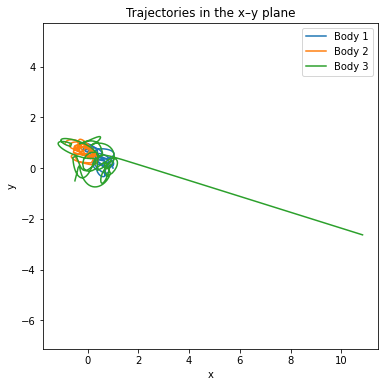

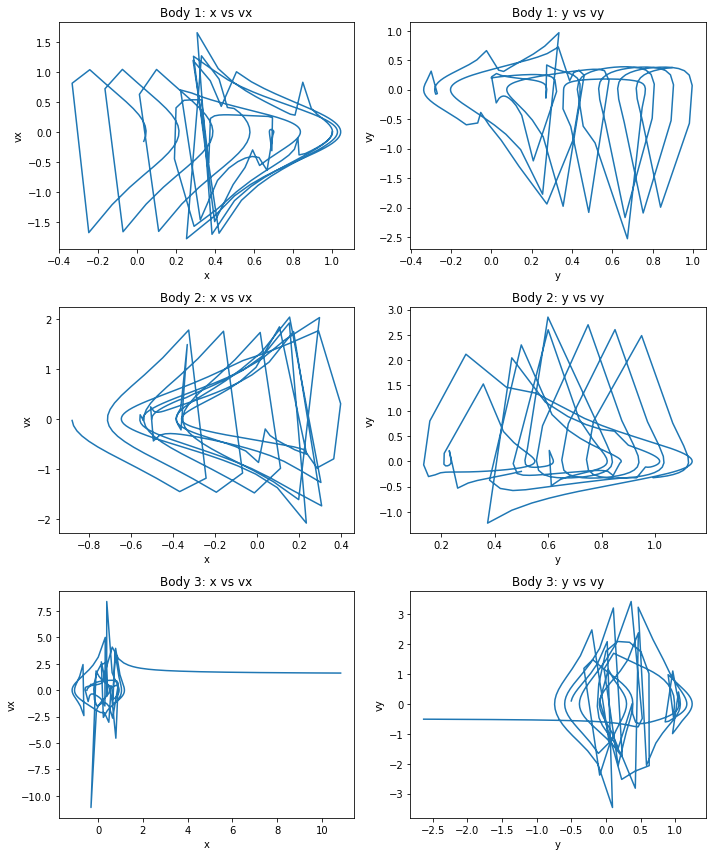

In [5]:
m1 = 1.0788  # α Centauri A 
m2 = 0.9092  # α Centauri B 
m3 = 0.1221  # Proxima Centauri 
G = 1.0
lag = Lagrangian(m1, m2, m3, G)


#    [x1, vx1, y1, vy1,  x2, vx2, y2, vy2,  x3, vx3, y3, vy3]
initial_conditions = [
    1.0,  0.0,   0.0,  0.2,        # body 1
   -0.5,  0.0,  0.5, -0.2,         # body 2
   -0.5,  0.0, -0.5,  0.1          # body 3
]


t_pts = np.linspace(0, 25, 300)   
r1, r2, r3 = lag.solve_ode(t_pts, initial_conditions)

plt.figure(figsize=(6,6))
plt.plot(r1[0], r1[2], label='Body 1')
plt.plot(r2[0], r2[2], label='Body 2')
plt.plot(r3[0], r3[2], label='Body 3')
plt.xlabel('x');  plt.ylabel('y')
plt.legend();  plt.axis('equal')
plt.title('Trajectories in the x–y plane')
plt.show()


fig, axes = plt.subplots(3, 2, figsize=(10, 12))

for i, (r, name) in enumerate([(r1,'Body 1'), (r2,'Body 2'), (r3,'Body 3')]):
    # x vs vx
    axes[i,0].plot(r[0], r[1])
    axes[i,0].set_title(f'{name}: x vs vx')
    axes[i,0].set_xlabel('x');  axes[i,0].set_ylabel('vx')
    # y vs vy
    axes[i,1].plot(r[2], r[3])
    axes[i,1].set_title(f'{name}: y vs vy')
    axes[i,1].set_xlabel('y');  axes[i,1].set_ylabel('vy')

plt.tight_layout()
plt.show()


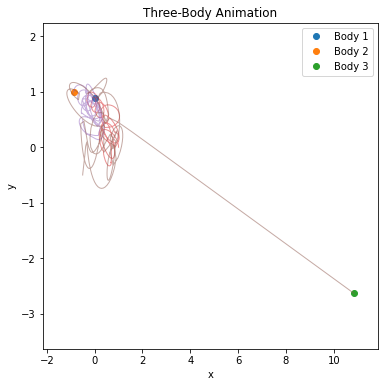

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML
m1 = 1.0788  # α Centauri A 
m2 = 0.9092  # α Centauri B 
m3 = 0.1221  # Proxima Centauri 
G = 1.0
lag = Lagrangian(m1, m2, m3, G)


initial_conditions = [
    1.0,  0.0,   0.0,  0.2,        # body 1
   -0.5,  0.0,  0.5, -0.2,         # body 2
   -0.5,  0.0, -0.5,  0.1          # body 3
]
t_pts = np.linspace(0, 25, 300)


r1, r2, r3 = lag.solve_ode(t_pts, initial_conditions)


fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(min(r1[0].min(), r2[0].min(), r3[0].min()) - 1,
            max(r1[0].max(), r2[0].max(), r3[0].max()) + 1)
ax.set_ylim(min(r1[2].min(), r2[2].min(), r3[2].min()) - 1,
            max(r1[2].max(), r2[2].max(), r3[2].max()) + 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Three-Body Animation')


points = [ax.plot([], [], 'o', label=f'Body {i+1}')[0] for i in range(3)]
trails = [ax.plot([], [], '-', lw=1, alpha=0.5)[0] for _ in range(3)]
ax.legend()


def init():
    for p, trail in zip(points, trails):
        p.set_data([], [])
        trail.set_data([], [])
    return points + trails


def animate(i):
    coords = [(r1[0][i], r1[2][i]),
              (r2[0][i], r2[2][i]),
              (r3[0][i], r3[2][i])]

    for j, (p, trail, (x, y)) in enumerate(zip(points, trails, coords)):
        p.set_data(x, y)
        # Update trails up to current frame
        if j == 0:
            trail.set_data(r1[0][:i+1], r1[2][:i+1])
        elif j == 1:
            trail.set_data(r2[0][:i+1], r2[2][:i+1])
        elif j == 2:
            trail.set_data(r3[0][:i+1], r3[2][:i+1])

    return points + trails



rc('animation', html='jshtml')


ani = animation.FuncAnimation(
    fig, animate, frames=len(t_pts),
    init_func=init, blit=True, interval=40
)

HTML(ani.to_jshtml())

## Simulating the Trisolaran Planet as a Test Mass

Here, I introduce a **massless fourth body** into the system to represent the **planet of the Trisolaran civilization** from *The Three-Body Problem*. This fourth body does **not affect the motion** of the three stars, but it **experiences their gravitational forces**.

The setup continues from the previous section, where the three stars evolve under their mutual gravity. The fourth body (the planet) is initialized at a modest distance with a small velocity and is treated as a **test particle** — ideal for approximating the motion of a lightweight planet in a stellar system.

### Observation

The result shows that the Trisolaran planet is **highly sensitive to the gravitational chaos** of the system. Within a short time, it is:

>  **Thrown out of the system**, following an unstable, rapidly diverging trajectory.

This aligns well with the novel's depiction of **destructive stellar dynamics**, and supports the idea that **life in such a system would constantly face existential risk**, motivating the Trisolarans' search for a more stable home.


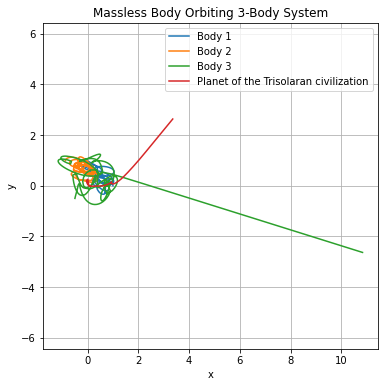

In [8]:
m1 = 1.0788  # α Centauri A 
m2 = 0.9092  # α Centauri B 
m3 = 0.1221  # Proxima Centauri 
G = 1.0

initial_conditions = [
    1.0,  0.0,   0.0,  0.2,        # body 1
   -0.5,  0.0,  0.5, -0.2,         # body 2
   -0.5,  0.0, -0.5,  0.1          # body 3
]



t_pts = np.linspace(0, 25, 300)   

# 4. Call the solver
lag = Lagrangian(m1, m2, m3, G)
r1, r2, r3 = lag.solve_ode(t_pts, initial_conditions)

# Stack x and y positions into (N, 2) arrays for each body
r1_hist = np.stack([r1[0], r1[2]], axis=1)  # [x1(t), y1(t)]
r2_hist = np.stack([r2[0], r2[2]], axis=1)
r3_hist = np.stack([r3[0], r3[2]], axis=1)

from scipy.interpolate import interp1d

interp_r1 = interp1d(t_pts, r1_hist, axis=0)
interp_r2 = interp1d(t_pts, r2_hist, axis=0)
interp_r3 = interp1d(t_pts, r3_hist, axis=0)

def dy_dt_4th(t, y):
    r4 = y[0:2]  # position
    v4 = y[2:4]  # velocity

    # Positions of other bodies at time t
    r1 = interp_r1(t)
    r2 = interp_r2(t)
    r3 = interp_r3(t)

    def accel(ri):
        diff = r4 - ri
        return -0.01*G * diff / (np.linalg.norm(diff)**3 + 1e-9)

    a4 = accel(r1) + accel(r2) + accel(r3)
    return np.concatenate([v4, a4])


# Initial condition for the 4th body: [x, y, vx, vy]
y0_4 = [0.1, -0.01, 0.0, 0.0]  

# Integrate over the same time grid
sol_4 = solve_ivp(dy_dt_4th, [t_pts[0], t_pts[-1]], y0_4, t_eval=t_pts)
x4, y4 = sol_4.y[0], sol_4.y[1]

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(r1[0], r1[2], label='Body 1')
plt.plot(r2[0], r2[2], label='Body 2')
plt.plot(r3[0], r3[2], label='Body 3')
plt.plot(x4, y4, label='Planet of the Trisolaran civilization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.title('Massless Body Orbiting 3-Body System')
plt.show()


##  Stable Solutions in the Three-Body Problem

While the general three-body problem is chaotic and lacks a closed-form solution, there exist several **remarkable stable solutions** that are both mathematically elegant and physically fascinating. Below are two such examples visualized through simulation:

---

###  Rotating Triangle (Lagrange Solution)

In the first plot, each of the three bodies starts at the vertex of an equilateral triangle and moves in a **circular orbit** around the system's center of mass. This configuration remains stable over time, forming a rotating triangle that preserves its shape.

This solution reflects a **Lagrange point configuration** and is a rare example of equilibrium in a three-body gravitational system. It also closely resembles the motion of **Trojan asteroids** that share orbits with planets like Jupiter.

---

###  Figure-Eight Choreography (Moore-Chenciner-Montgomery Solution)

The second plot shows the mesmerizing **figure-eight orbit**, where all three bodies follow the same path in space, evenly spaced in time. This was discovered numerically in the 1990s and later proven analytically.

In this solution:
- All three bodies have equal mass.
- They **follow the same lemniscate-shaped trajectory**, separated by one-third of the period.
- The system has **zero angular momentum** and total energy is conserved.

Despite its delicate symmetry, this configuration is **surprisingly stable** under ideal conditions.

---

These two examples highlight that amidst chaos, the three-body problem still holds **islands of order**, and serves as a profound reminder of the beauty hidden within complex gravitational systems.


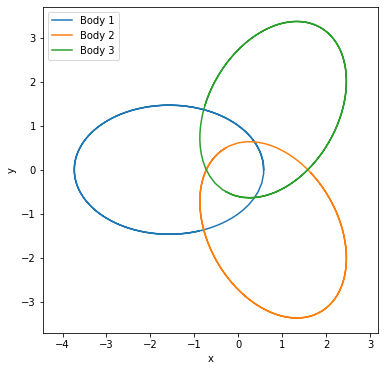

In [9]:
# 1) parameters
m = 1.0                  # equal masses
G = 1.0                  # gravitational constant
r = 1.0                  # side length of the triangle
R = r / np.sqrt(3)       # distance from COM to each mass (triangle height/3)
omega = np.sqrt(G * m / R**3)  # corrected angular speed
v = omega * R            # tangential speed


# 2) initial positions & velocities
initial_conditions = [
    R,         0.000,            0.0,         v,             # Body 1
    -R/2,     -v*np.sin(np.pi/3),  np.sqrt(3)/2*R, -v*np.cos(np.pi/3),  # Body 2
    -R/2,      v*np.sin(np.pi/3), -np.sqrt(3)/2*R, -v*np.cos(np.pi/3),  # Body 3
]



t_pts = np.linspace(0, 50, 300)   


lag = Lagrangian(m, m, m, G)
r1, r2, r3 = lag.solve_ode(t_pts, initial_conditions)

plt.figure(figsize=(6,6))
plt.plot(r1[0], r1[2], label='Body 1')
plt.plot(r2[0], r2[2], label='Body 2')
plt.plot(r3[0], r3[2], label='Body 3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()


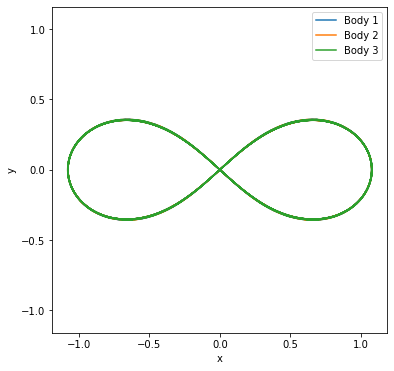

In [10]:
m = 1.0
G = 1.0
lag = Lagrangian(m, m, m, G)

initial_conditions = [
     0.97000436,   -0.4662036850,   -0.24308753,   -0.4323657300,  # Body 1
    -0.97000436,   -0.4662036850,    0.24308753,   -0.4323657300,  # Body 2
     0.0,           0.93240737,      0.0,           0.86473146     # Body 3
]



t_pts = np.linspace(0, 50, 300)  


r1, r2, r3 = lag.solve_ode(t_pts, initial_conditions)


plt.figure(figsize=(6,6))
plt.plot(r1[0], r1[2], label='Body 1')
plt.plot(r2[0], r2[2], label='Body 2')
plt.plot(r3[0], r3[2], label='Body 3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()


##  Sensitivity to Initial Conditions

To test the stability of the rotating triangle solution, I made a very small change: I increased the $y$-coordinate of one of the masses by just **0.001**.

Despite the seemingly insignificant difference, the result was dramatic — the system quickly drifted away from the symmetric triangular motion and showed signs of **chaotic behavior**.

This once again highlights a defining feature of the three-body problem:

> Even a tiny perturbation in the initial conditions can lead to a completely different and unpredictable trajectory.

This sensitivity is a hallmark of **chaotic systems**, where **long-term prediction becomes impossible** due to exponential divergence of nearby solutions.


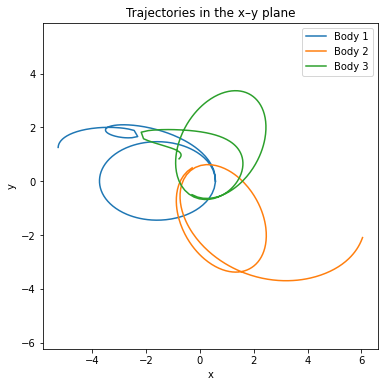

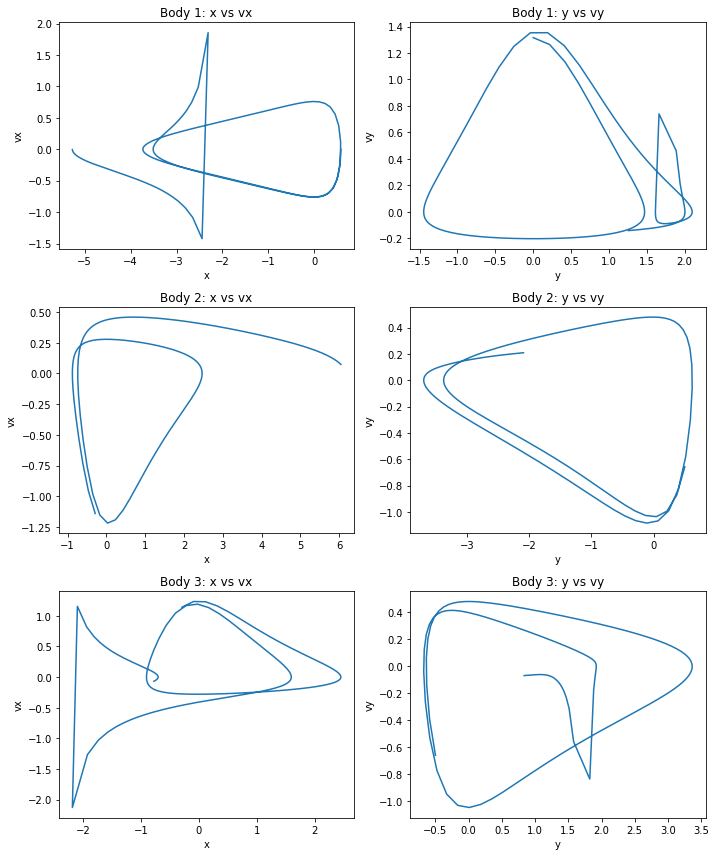

In [11]:
m = 1.0                  # equal masses
G = 1.0                  # gravitational constant
r = 1.0                  # side length of the triangle
R = r / np.sqrt(3)       # distance from COM to each mass (triangle height/3)
omega = np.sqrt(G * m / R**3)  # corrected angular speed
v = omega * R            # tangential speed


initial_conditions = [
    R,         0.000,            0.001,         v,             # Body 1
    -R/2,     -v*np.sin(np.pi/3),  np.sqrt(3)/2*R, -v*np.cos(np.pi/3),  # Body 2
    -R/2,      v*np.sin(np.pi/3), -np.sqrt(3)/2*R, -v*np.cos(np.pi/3),  # Body 3
]

t_pts = np.linspace(0, 50, 300)
lag = Lagrangian(m, m, m, G)
r1, r2, r3 = lag.solve_ode(t_pts, initial_conditions)



plt.figure(figsize=(6,6))
plt.plot(r1[0], r1[2], label='Body 1')
plt.plot(r2[0], r2[2], label='Body 2')
plt.plot(r3[0], r3[2], label='Body 3')
plt.xlabel('x');  plt.ylabel('y')
plt.legend();  plt.axis('equal')
plt.title('Trajectories in the x–y plane')
plt.show()


fig, axes = plt.subplots(3, 2, figsize=(10, 12))

for i, (r, name) in enumerate([(r1,'Body 1'), (r2,'Body 2'), (r3,'Body 3')]):
    # x vs vx
    axes[i,0].plot(r[0], r[1])
    axes[i,0].set_title(f'{name}: x vs vx')
    axes[i,0].set_xlabel('x');  axes[i,0].set_ylabel('vx')
    # y vs vy
    axes[i,1].plot(r[2], r[3])
    axes[i,1].set_title(f'{name}: y vs vy')
    axes[i,1].set_xlabel('y');  axes[i,1].set_ylabel('vy')

plt.tight_layout()
plt.show()


##  Energy Tracking and Long-Term Behavior

To further understand the system’s dynamics, I implemented a function `system_energy()` to calculate the **total energy** of the system over time. I applied it to the **rotating triangle solution** discussed earlier.

###  Observations:

1.  **Total energy is conserved**  
   Throughout the simulation, the calculated total energy remains stable, confirming that the numerical integration preserves energy within a reasonable tolerance.

2.  **Lagrangian vs. Hamiltonian Approaches**  
   In the context of this triple-star setup, both the **Lagrangian** and **Hamiltonian** formulations give consistent and equivalent results. Neither approach showed a distinct advantage for simulating this particular problem.

3.  **Instability Over Time**  
   Even though the rotating triangle is a mathematically stable solution, long-term numerical simulations reveal that the system **eventually becomes chaotic**. This is due to the extreme **sensitivity to initial conditions**, and it reinforces a key truth of the three-body problem:

>  In realistic simulations, even idealized stable solutions can drift due to numerical errors and inherent chaos, making **long-term prediction nearly impossible**.

This highlights why the Trisolarans, despite their advanced technology, are desperate to leave their home system and seek refuge on Earth — their civilization is trapped in an inherently unstable and unpredictable stellar environment.


In [12]:
def system_energy(r1, r2, r3, m1, m2, m3, G):
    x1, vx1, y1, vy1 = r1
    x2, vx2, y2, vy2 = r2
    x3, vx3, y3, vy3 = r3
    
    # Kinetic Energy
    T = 0.5 * m1 * (vx1**2 + vy1**2) + \
        0.5 * m2 * (vx2**2 + vy2**2) + \
        0.5 * m3 * (vx3**2 + vy3**2)
    
    # Distances
    r12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    r13 = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
    r23 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)
    
    # Potential Energy
    V = -G * (m1 * m2 / r12 + m1 * m3 / r13 + m2 * m3 / r23)

    # Total Energy
    return T + V

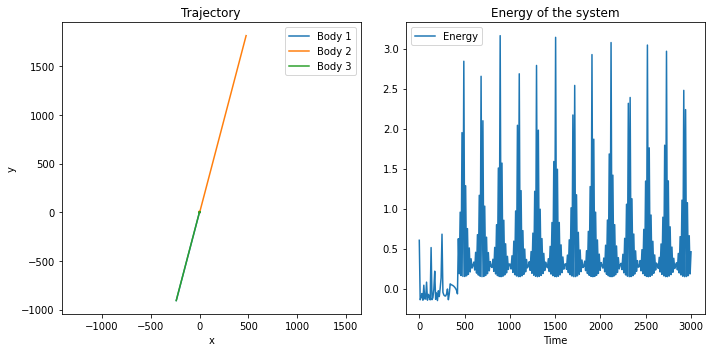

In [13]:
m = 1.0                  # equal masses
G = 1.0                  # gravitational constant
r = 1.0                  # side length of the triangle
R = r / np.sqrt(3)       # distance from COM to each mass (triangle height/3)
omega = np.sqrt(G * m / R**3)  # corrected angular speed
v = omega * R            # tangential speed



initial_conditions = [
    R,         0.000,            0.00,         v,             # Body 1
    -R/2,     -v*np.sin(np.pi/3),  np.sqrt(3)/2*R, -v*np.cos(np.pi/3),  # Body 2
    -R/2,      v*np.sin(np.pi/3), -np.sqrt(3)/2*R, -v*np.cos(np.pi/3),  # Body 3
]



t_pts = np.linspace(0, 3000, 300)   


lag = Lagrangian(m, m, m, G)
r1, r2, r3 = lag.solve_ode(t_pts, initial_conditions)

#ham = Hamiltonian(m, m, m, G)
#r1, r2, r3 = ham.solve_ode(t_pts, initial_conditions)

fig = plt.figure(figsize=(10,5))  


ax1 = fig.add_subplot(1,2,1)  
ax1.plot(r1[0], r1[2], label='Body 1')
ax1.plot(r2[0], r2[2], label='Body 2')
ax1.plot(r3[0], r3[2], label='Body 3')
ax1.set_title('Trajectory')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.axis('equal')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)  
ax2.plot(t_pts, system_energy(r1, r2, r3, m1, m2, m3, G), label='Energy')  
ax2.set_title('Energy of the system')
ax2.set_xlabel('Time')
ax2.legend()

fig.tight_layout()  
plt.show()


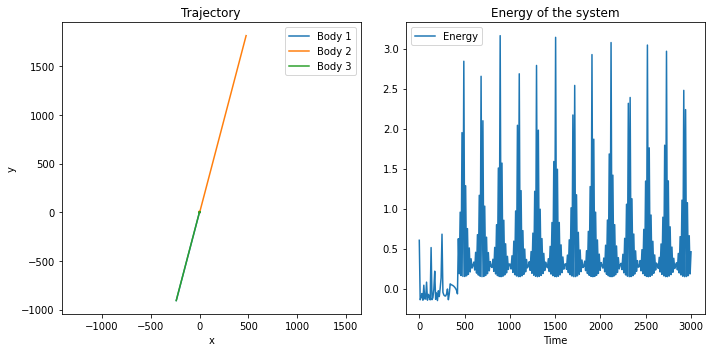

In [14]:
m = 1.0                  # equal masses
G = 1.0                  # gravitational constant
r = 1.0                  # side length of the triangle
R = r / np.sqrt(3)       # distance from COM to each mass (triangle height/3)
omega = np.sqrt(G * m / R**3)  # corrected angular speed
v = omega * R            # tangential speed


initial_conditions = [
    R,         0.000,            0.0,         v,             # Body 1
    -R/2,     -v*np.sin(np.pi/3),  np.sqrt(3)/2*R, -v*np.cos(np.pi/3),  # Body 2
    -R/2,      v*np.sin(np.pi/3), -np.sqrt(3)/2*R, -v*np.cos(np.pi/3),  # Body 3
]


t_pts = np.linspace(0, 3000, 300)   


#lag = Lagrangian(m, m, m, G)
#r1, r2, r3 = lag.solve_ode(t_pts, initial_conditions)

ham = Hamiltonian(m, m, m, G)
r1, r2, r3 = ham.solve_ode(t_pts, initial_conditions)

fig = plt.figure(figsize=(10,5)) 

# call the first axis ax1
ax1 = fig.add_subplot(1,2,1)  
ax1.plot(r1[0], r1[2], label='Body 1')
ax1.plot(r2[0], r2[2], label='Body 2')
ax1.plot(r3[0], r3[2], label='Body 3')
ax1.set_title('Trajectory')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.axis('equal')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)  
ax2.plot(t_pts, system_energy(r1, r2, r3, m1, m2, m3, G), label='Energy')  
ax2.set_title('Energy of the system')
ax2.set_xlabel('Time')
ax2.legend()

fig.tight_layout()   
plt.show()


##  Conclusion

Through this project, I explored the complex and fascinating dynamics of the **three-body problem** using both **Lagrangian** and **Hamiltonian** mechanics. Inspired by the science fiction novel *The Three-Body Problem*, I modeled the real-life **Alpha Centauri triple star system**, and investigated how small changes in initial conditions can lead to dramatically different outcomes.

### Key Takeaways:

- The three-body system is **extremely sensitive to initial conditions**, even in mathematically stable configurations like the rotating triangle or figure-eight orbit.
- In practice, **small numerical errors or perturbations** can quickly lead to chaotic behavior — an important limitation of any long-term simulation.
- The **total energy of the system is conserved** across both Lagrangian and Hamiltonian approaches, confirming the correctness of the numerical methods.
- Both formulations provided consistent results, with **no significant advantage** of one over the other in this specific gravitational setup.
- The behavior of a **massless test particle (Trisolaran planet)** in this system reinforces the novel's core premise: such an environment is **inherently unstable**, even under ideal conditions.

Overall, this project demonstrated not only the mathematical beauty of stable solutions but also the harsh physical reality of chaos in celestial mechanics — a challenge that even a highly advanced civilization might struggle to overcome.
